<a href="https://colab.research.google.com/github/shamshekhar0/AI-ML-Intern-Works/blob/main/Diabetes_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Head:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Dataset Tail:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             

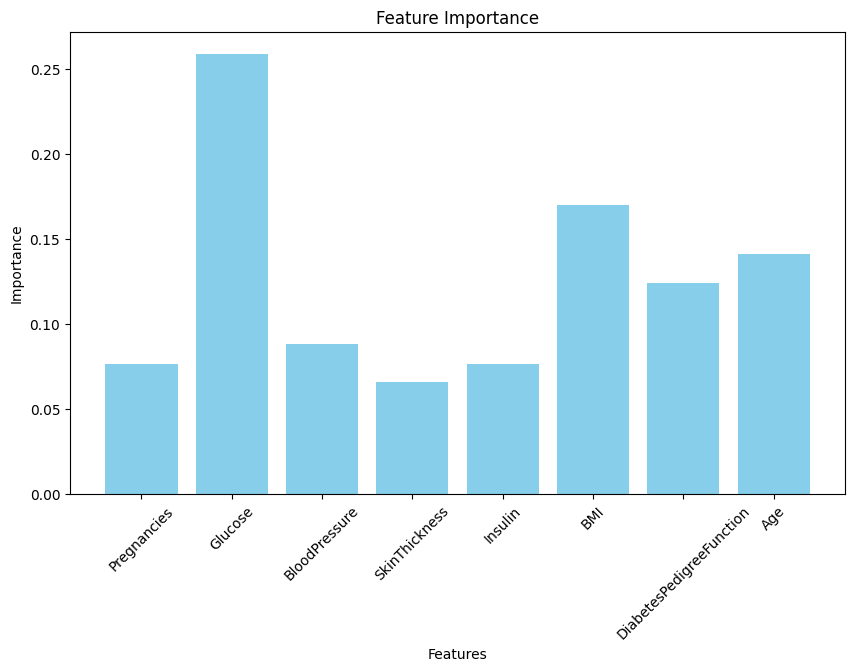

In [ ]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

#Load the dataset
data = pd.read_excel("/content/diabetes.xlsx")  # Ensure the file name matches the uploaded file

#Inspect the dataset
print("Dataset Head:")
print(data.head())
print("Dataset Tail:")
print(data.tail())
print("\nSummary Information:")
print(data.info())
print("\nMissing Values:")
print(data.isnull().sum())

#Handle missing values (if any)
data = data.dropna()  # Drop rows with missing values

#Define features and target variable
X = data.drop(columns=['Outcome'])  # Replace 'Outcome' with your target column name
y = data['Outcome']

# Step 8: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 9: Train a machine learning model (Random Forest Classifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 10: Make predictions and evaluate the model
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 11: Visualize feature importance
feature_importances = model.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()

In [ ]:
new_inputs = [
    [5, 116, 74, 0, 0, 25.6, 0.201, 30],  # Example input 1
    [1, 85, 66, 29, 0, 26.6, 0.351, 31],  # Example input 2
    [8, 183, 64, 0, 0, 23.3, 0.672, 32],  # Example input 3
    [2, 89, 92, 0, 0, 27.2, 0.167, 21],  # Example input 4
    [10, 115, 0, 0, 0, 35.3, 0.134, 29], # Example input 5
]

new_predictions = model.predict(new_inputs)

for i, prediction in enumerate(new_predictions):
    result = "Yes, He/She is Diabetic" if prediction == 1 else "He/She is Non-Diabetic"
    print(f"Patient {i + 1}: {result}")

Patient 1: He/She is Non-Diabetic
Patient 2: He/She is Non-Diabetic
Patient 3: Yes, He/She is Diabetic
Patient 4: He/She is Non-Diabetic
Patient 5: Yes, He/She is Diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
